## <span style="color:blue">  Numerical exercises 5</span>

Uno dei metodi Monte Carlo di campionamento più importanti è l'algoritmo di Metropoli $[M(RT)^2]$. Questo metodo si basa sulla proposta di una mossa che può essere accettata o meno e risulta essere molto versatile perchè la normalizzazione della distribuzione campionata è irrilevante.<p>
L'algoritmo pertanto è molto semplice e può essere usato per campionare distribuzioni di probabilità anche analiticamente complesse in qualsiasi dimensione. D'altra parte il campionamento risulta essere corretto solamenete asintoticamente e le successive variabili prodotto sono spesso  fortemente correlate (Catena di Markov).
L'idea sotto l'algoritmo di Metropolis è di trovare una particolare e regolare probabilità di transizione $K(x|y)$ di generare uno stato $x$ dato lo stato $y$, per campionare una desiderata distribuzione di probabilità.
Questo è assicurato imponendo il principio del bilancio dettagliato ovvero:$$K(x|y)p(y)=K(y|x)p(X)$$<p>
    
Per trovare un nucleo che soddisfa il principio del bilancio dettagliato l'algoritmo di Metropolis decompone la probabilità di transizione K in un prodotto di una transizione di probabilità di prova $T(x|y)$ e una probabilità di accettazione di una particolare mossa proposta $y\rightarrow x$, $A(x|y)$:$$K(x|y)=T(x|y)A(x|y)$$
Una possibile scelta di $A(x|y)$ data $T(x|y)$ è:$$A(x|y)=min[1,q(x|y)]$$
dove $q(x|y)$ è:$$q(x|y)=\frac{T(y|x)p(x)}{T(x|y)p(y)}\geq0$$


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

Per il ground state la funzione d'onda è della forma:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$Con valore di aspettazione :$$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$$<p>
Pertanto, assumendo una probabilità di transizione, $T(\vec x|\vec y)$ uniforme allora in questo caso si avrà: $$q(\vec x,\vec y)=\frac{p(\vec x)}{p(\vec y)}=e^{2(|\vec y|-|\vec x|)}$$ 

Si è quindi dapprima equilibrato il sistema scegliendo uno step per la dstribuzione unifrme di modo da avere la regola empirica del $50\%$.<p>
Di seguito sono riportate le due simulazioni avendo starting point differenti.Tali simulazioni sono state effettuate considerando 1000 blocchi con 1000 step Monte Carlo per ogni blocco, così da evitare di avere autocorelazione sulle misure e poter eseguire le medie statistiche.

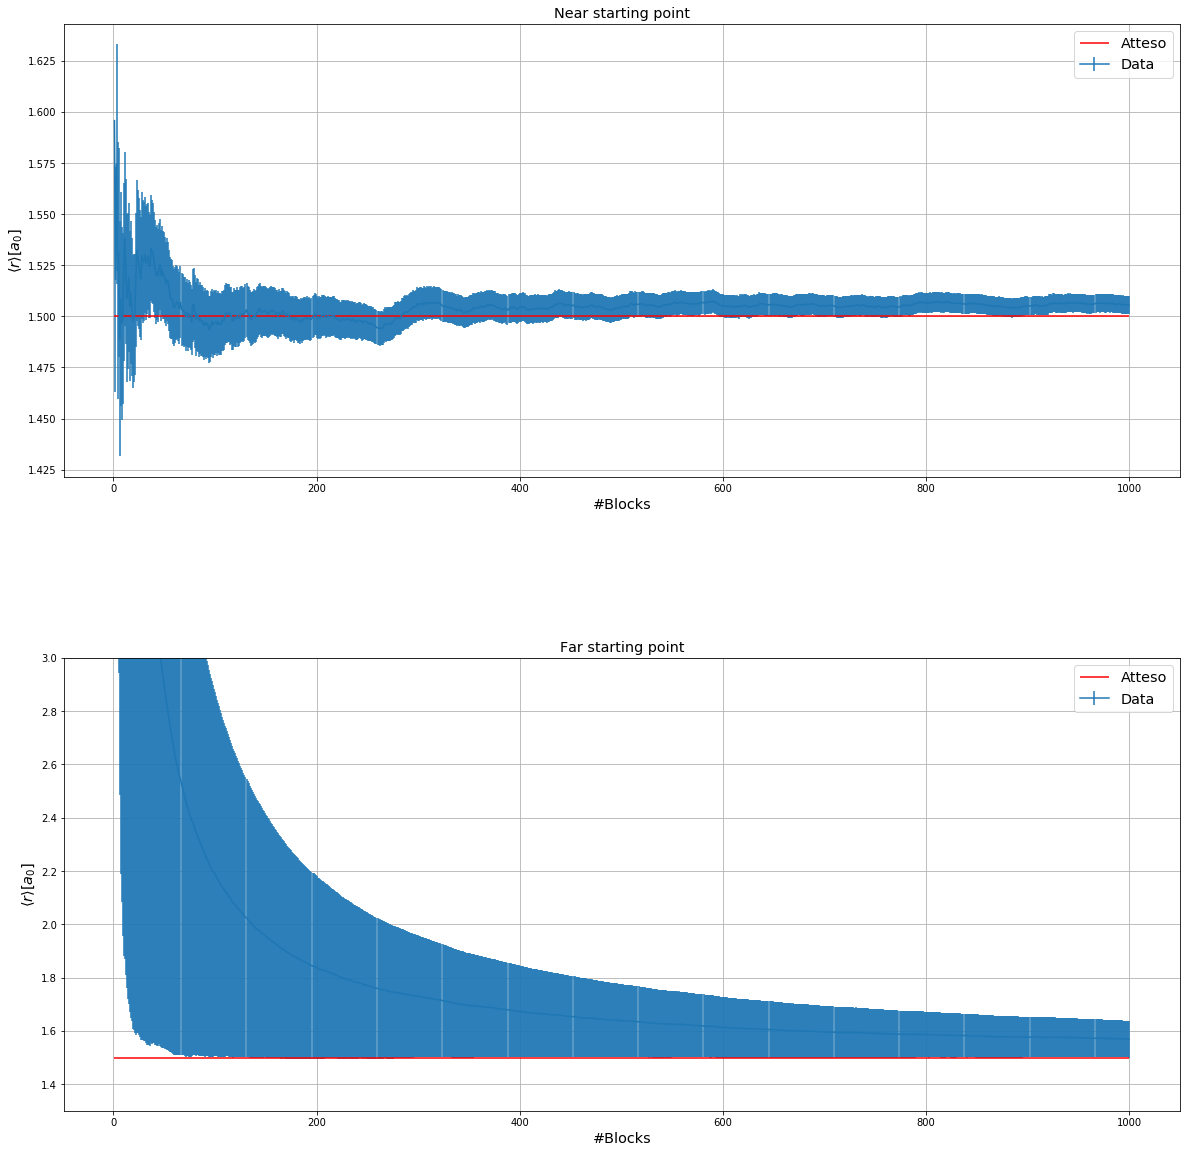

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

G = gridspec.GridSpec(2,1)

n1,mean1, dev_std1 = np.loadtxt("Es5.1/Uniform/output.distr_1s.dat", usecols=(0,1,2),  delimiter='\t',unpack='true')
n2,mean2, dev_std2 = np.loadtxt("Es5.1/Uniform/output.distr_1s_100.dat", usecols=(0,1,2),  delimiter='\t',unpack='true')

f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.4, wspace=0.4)
                            

fig_1=plt.subplot(G[0, 0])
fig_1.errorbar(n1,mean1,yerr=dev_std1,label="Data")
fig_1.set_title('Near starting point',fontsize='x-large')
fig_1.set_xlabel('#Blocks',fontsize='x-large')
fig_1.set_ylabel(r'$\langle r \rangle [a_0]$',fontsize='x-large')
fig_1.hlines(y=3/2.,xmin=min(n1), xmax=max(n1),color='r', linestyle='-',label="Atteso")
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.errorbar(n2,mean2,yerr=dev_std2,label="Data")
fig_2.set_title('Far starting point',fontsize='x-large')
fig_2.set_xlabel('#Blocks',fontsize='x-large')
fig_2.set_ylabel(r'$\langle r \rangle [a_0]$',fontsize='x-large')
fig_2.hlines(y=3/2.,xmin=min(n1), xmax=max(n1),color='r', linestyle='-',label="Atteso")
fig_2.legend(fontsize='x-large')

fig_2.set_ylim([1.3,3.])
fig_2.grid(True)
plt.show()

Dai grafici si nota che una cattiva scelta del punto iniziale della simulazione $[(100,100,100)$ in unità di $a_0$ $]$ determina in particolare pre i primi blocchi un forte discostamento dal valore attenso (sovrastimandolo) così come l'aumento dell'incertezza statistica. Inoltre, anche se all'aumentare del numero di blocchi il valore medio calcolato tende al valore atteso l'incertezza statistica finale risulta molto maggiore rispetto al caso di uno starting point più vicino all'origine.

Una delle funzioni d'onda $2p$ è:$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$ con valore di aspettazione:
$$
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$$<p>
Sempre considerando una probabilità di transizione, $T(\vec x|\vec y)$ uniforme si avrà: $$q(\vec x,\vec y)=\frac{p(\vec x)}{p(\vec y)}=e^{(|\vec y|-|\vec x|)}\bigg|\frac{z_{new}}{z_{old}}\bigg|^2$$ 
    
    

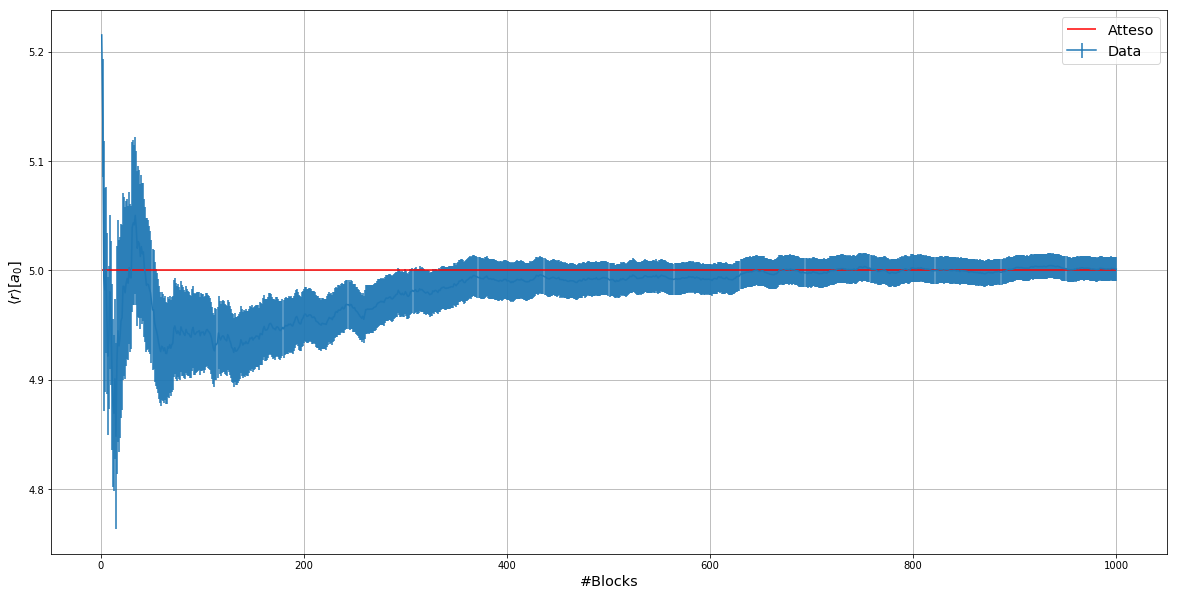

In [2]:
n1,mean1, dev_std1 = np.loadtxt("Es5.1/Uniform/output.distr_2p.dat", usecols=(0,1,2),  delimiter='\t',unpack='true')
plt.figure(figsize=(20,10))
plt.errorbar(n1,mean1,yerr=dev_std1,label="Data")
plt.xlabel('#Blocks',fontsize='x-large')
plt.ylabel(r'$\langle r \rangle [a_0]$',fontsize='x-large')
plt.hlines(y=5.,xmin=min(n1), xmax=max(n1),color='r', linestyle='-',label="Atteso")
plt.legend(fontsize='x-large')
plt.grid(True)
plt.show()

Al'aumentare del numerodi blocchi il valore medio tende entro l'incertezza statistica al valore atteso

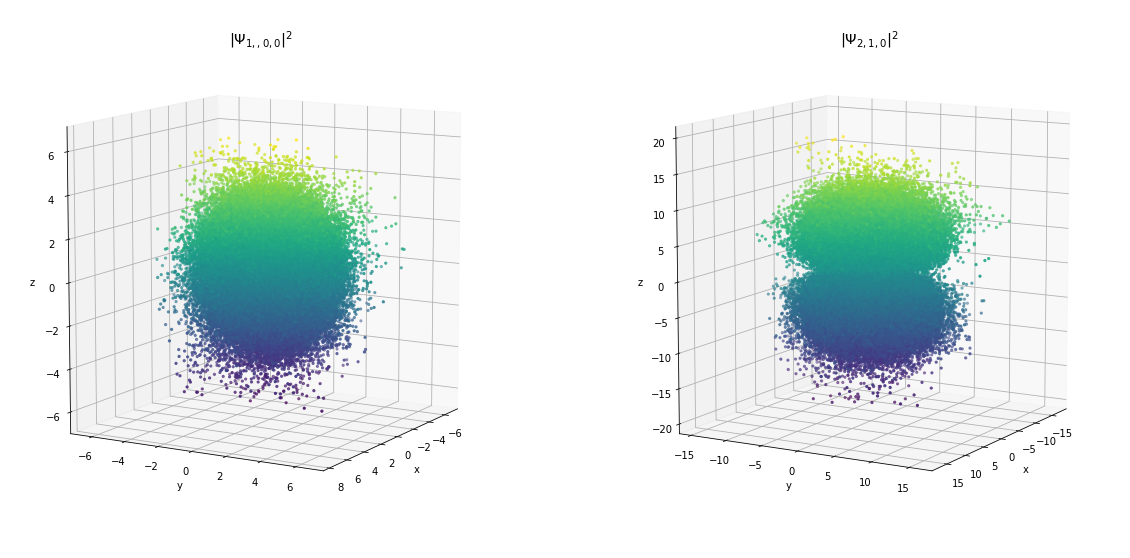

In [3]:
X1 ,Y1, Z1 = np.loadtxt("Es5.1/Uniform/output.XYZ_1s.dat", usecols=(0,1,2),  delimiter='\t', unpack='true')
X2 ,Y2, Z2 = np.loadtxt("Es5.1/Uniform/output.XYZ_2p.dat", usecols=(0,1,2),  delimiter='\t', unpack='true')

f = plt.figure(figsize=(20,10))
f.subplots_adjust(hspace=0.4, wspace=0.2)
G = gridspec.GridSpec(1,2)

fig_1=plt.subplot(G[0, 0], projection='3d')

fig_1.scatter(X1, Y1, Z1, c=Z1, marker='.')
fig_1.set_xlabel('x')
fig_1.set_ylabel('y')
fig_1.set_zlabel('z')
fig_1.set_title(r'$|\Psi_{1,,0,0}|^2$',fontsize='x-large')
fig_1.view_init(10, 30)

fig_2=plt.subplot(G[0, 1], projection='3d')
fig_2.scatter(X2, Y2, Z2, c=Z2, marker='.')
fig_2.set_xlabel('x')
fig_2.set_ylabel('y')
fig_2.set_zlabel('z')
fig_2.set_title(r'$|\Psi_{2,1,0}|^2$',fontsize='x-large')
fig_2.view_init(10, 30)


plt.show()

In figura le distribuzioni le distribuzioni di probabilità campionate, ovvero gli orbitali atomici $1s$ e $2p_x$

Consideriamo ora una probabilità di transizione di prova distribuita normalmente $\sim N(0,\delta)$ per ogni coordinata.

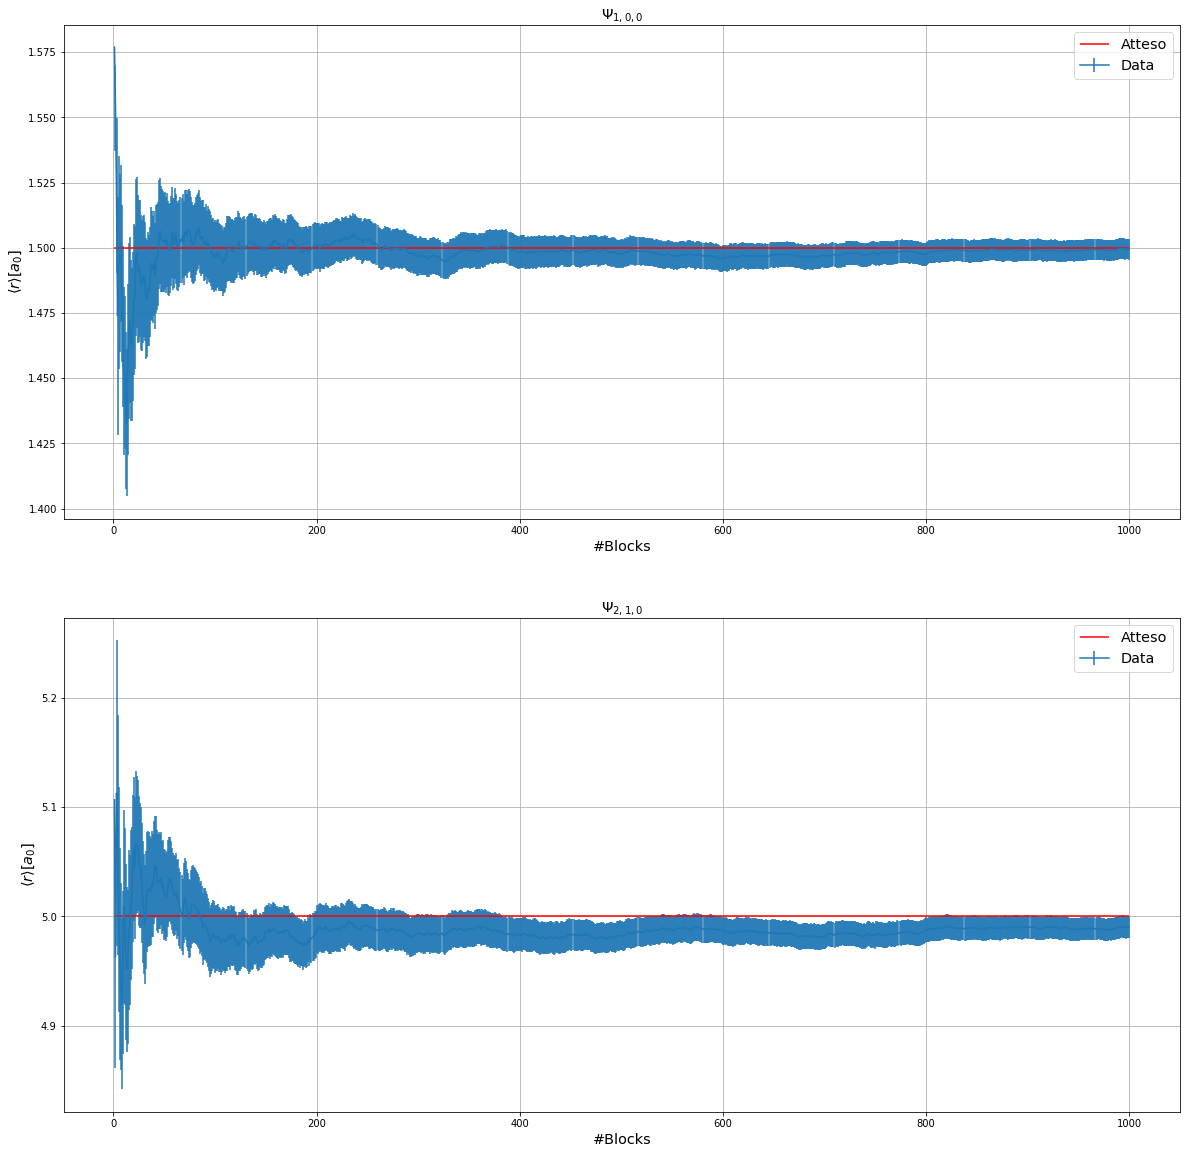

In [4]:
n1,mean1, dev_std1 = np.loadtxt("Es5.1/Gauss/output.distr_1s.dat", usecols=(0,1,2),  delimiter='\t',unpack='true')
n2,mean2, dev_std2 = np.loadtxt("Es5.1/Gauss/output.distr_2p.dat", usecols=(0,1,2),  delimiter='\t',unpack='true')

G = gridspec.GridSpec(2,1)
f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.2, wspace=0.4)
                            

fig_1=plt.subplot(G[0, 0])
fig_1.errorbar(n1,mean1,yerr=dev_std1,label="Data")
fig_1.set_title(r'$\Psi_{1,0,0}$',fontsize='x-large')
fig_1.set_xlabel('#Blocks',fontsize='x-large')
fig_1.set_ylabel(r'$\langle r \rangle [a_0]$',fontsize='x-large')
fig_1.hlines(y=3/2.,xmin=min(n1), xmax=max(n1),color='r', linestyle='-',label="Atteso")
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1, 0])
fig_2.errorbar(n2,mean2,yerr=dev_std2,label="Data")
fig_2.set_title(r'$\Psi_{2,1,0}$',fontsize='x-large')
fig_2.set_xlabel('#Blocks',fontsize='x-large')
fig_2.set_ylabel(r'$\langle r \rangle [a_0]$',fontsize='x-large')
fig_2.hlines(y=5.,xmin=min(n1), xmax=max(n1),color='r', linestyle='-',label="Atteso")
fig_2.legend(fontsize='x-large')
fig_2.grid(True)
plt.show()

Dai grafici si può notare come i risultati ottenuti siano equivalenti al caso in cui si era considerata $T(\vec x|\vec y)$ uniforme.

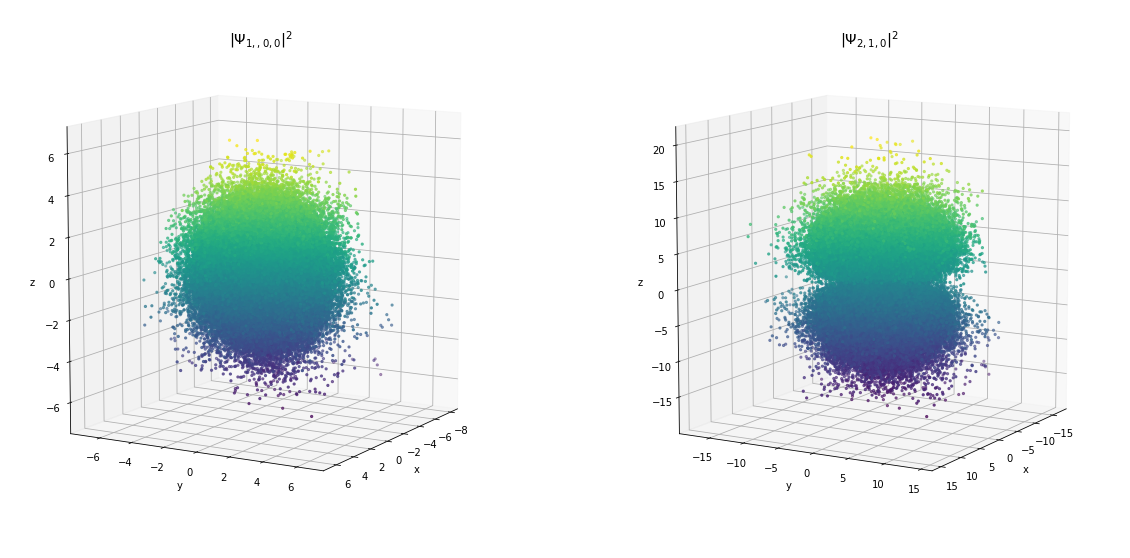

In [6]:
X1 ,Y1, Z1 = np.loadtxt("Es5.1/Gauss/output.XYZ_1s.dat", usecols=(0,1,2),  delimiter='\t', unpack='true')
X2 ,Y2, Z2 = np.loadtxt("Es5.1/Gauss/output.XYZ_2p.dat", usecols=(0,1,2),  delimiter='\t', unpack='true')

f = plt.figure(figsize=(20,10))
f.subplots_adjust(hspace=0.4, wspace=0.2)
G = gridspec.GridSpec(1,2)

fig_1=plt.subplot(G[0, 0], projection='3d')

fig_1.scatter(X1, Y1, Z1, c=Z1, marker='.')
fig_1.set_xlabel('x')
fig_1.set_ylabel('y')
fig_1.set_zlabel('z')
fig_1.set_title(r'$|\Psi_{1,,0,0}|^2$',fontsize='x-large')
fig_1.view_init(10, 30)

fig_2=plt.subplot(G[0, 1], projection='3d')
fig_2.scatter(X2, Y2, Z2, c=Z2, marker='.')
fig_2.set_xlabel('x')
fig_2.set_ylabel('y')
fig_2.set_zlabel('z')
fig_2.set_title(r'$|\Psi_{2,1,0}|^2$',fontsize='x-large')
fig_2.view_init(10, 30)


plt.show()